In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
L = 2.5
P = 700
Q = 50
R = 150

b = 400
h = 300
t = 5

x = sp.symbols('x')

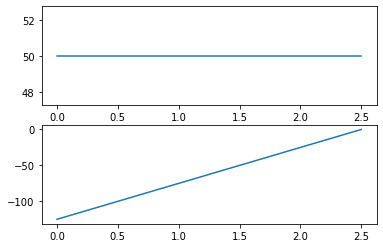

In [3]:
# PLANO Z - X
cortante_plano_zx = Q
M = L * Q
momento_plano_zx = - M + Q * x

x_axis = np.linspace(0, L, 999)
cortante_1 =np.full_like(x_axis, cortante_plano_zx)
momento_1 = sp.lambdify(x, momento_plano_zx)(x_axis)

fig, (axes_1, axes_2) = plt.subplots(nrows=2, ncols=1)

axes_1.plot(x_axis, cortante_1)
axes_2.plot(x_axis, momento_1)

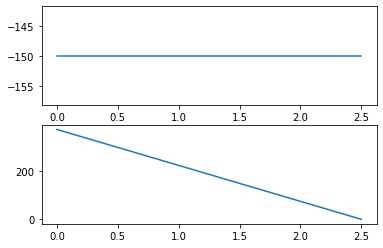

In [4]:
# PLANO X - Y
cortante_plano_xy = - R
M = L * R
momento_plano_xy = M + cortante_plano_xy * x
cortante_2 =np.full_like(x_axis, cortante_plano_xy)
momento_2 = sp.lambdify(x, momento_plano_xy)(x_axis)

fig, (axes_1, axes_2) = plt.subplots(nrows=2, ncols=1)

axes_1.plot(x_axis, cortante_2)
axes_2.plot(x_axis, momento_2)

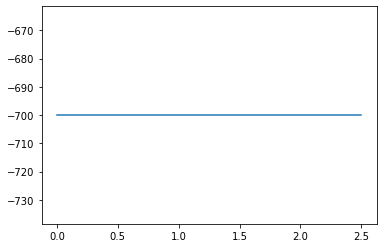

In [5]:
# DFA
axial =np.full_like(x_axis, -P)

plt.plot(x_axis, axial)

# FLEXIÓN

In [6]:
A = b * t + (h - t) * t
centroide = (b * t * (h - t / 2) + (h - t) * t * (h - t) / 2) / A
Iy = b ** 3 * t / 12 + (h - t) * t ** 3 / 12
Iz = b * t ** 3 / 12 + (h - t) ** 3 * t / 12 + b * t * (centroide - (h - t / 2)) ** 2 + (h - t) * t * (centroide - (h - t) / 2) ** 2
A, centroide, Iy, Iz

(3475, 233.83093525179856, 26669739.583333336, 29801709.007793766)

In [7]:
esfuerzo_compresion = - P * 10 ** 3 / A
Mz = sp.Lambda(x, momento_plano_xy)
My = sp.Lambda(x, momento_plano_zx)

def obtener_esfuerzo(x, y, z):
    momento_z = float(Mz(x))
    momento_y = float(My(x))
    esfuerzo = esfuerzo_compresion + momento_y * 10 ** 6 * z / Iy - momento_z * 10 ** 6 * y / Iz
    return esfuerzo

In [8]:
# EJE NEUTRO
y_neutro = np.linspace(-centroide, h - centroide, 999)
eje_neutro = (L * R * 10 ** 6 * y_neutro / Iz - esfuerzo_compresion) * Iy / (L * Q * 10 ** 6)

In [9]:
y = np.arange(h - centroide - t, h - centroide + 0.05, 0.05)
y2 = np.arange(-centroide, h - centroide - t + 0.5, 0.5)
len(y2)

591

In [12]:
z1 = np.linspace(-b / 2, b / 2, 101)
z1 = np.tile(z1, (int(t / 0.05 + 1), 1))
z2 = np.linspace(-t / 2, t / 2, 591)
z2 = np.tile(z2, (591, 1))
len(z2)

591

(-210.0, 210.0)

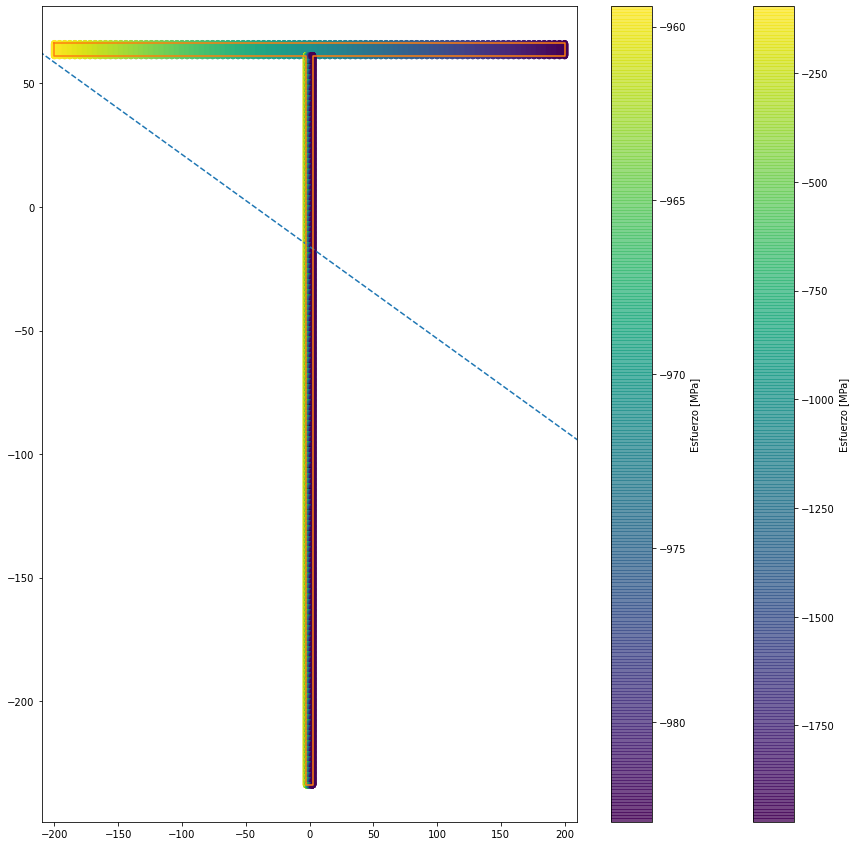

In [22]:
plt.rcParams["figure.figsize"] = (15,15)

for Z_val, Y_val in zip(z1, y):
    esfuerzos_flexion = obtener_esfuerzo(0, Y_val, Z_val)
    plt.scatter(Z_val, np.full_like(y, Y_val), c=esfuerzos_flexion, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Esfuerzo [MPa]')

for Z_val, Y_val in zip(z2, y2):
    esfuerzos_flexion = obtener_esfuerzo(0, Y_val, Z_val)
    #if esfuerzos_flexion[0] > 0:
        #print(esfuerzos_flexion)
    plt.scatter(Z_val, np.full_like(y2, Y_val), c=esfuerzos_flexion, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Esfuerzo [MPa]')

plt.plot( - eje_neutro, y_neutro, linestyle='--')
plt.plot([-b / 2, b / 2, b / 2, t / 2, t / 2, - t / 2, -t / 2, -b / 2, -b / 2], [h - centroide, h - centroide, h - centroide - t, h - centroide - t, -centroide, -centroide, h - centroide - t, h - centroide - t, h - centroide])
plt.xlim([-b / 2 - 10, b / 2 + 10])

In [ ]:
z = np.linspace(-b / 2, b / 2, 999)
y_neutro = np.linspace(-centroide, h - centroide, 999)

Z, Y = np.meshgrid(z, y)

esfuerzos_flexion = obtener_esfuerzo(0, Y, Z)
#plt.matshow(esfuerzos_flexion, cmap="jet")
y

In [ ]:
esfuerzos_flexion[0]

In [ ]:
test = np.array([1, 2])
test2 = np.array([3, 4])

T1, T2 = np.meshgrid(test, test2)
gaussian = ((T1**2) / 2 + (T2**2) / 2)
gaussian

In [ ]:
T1, T2

In [ ]:
esfuerzos_flexion = obtener_esfuerzo(0, y[-1], z1[0])
esfuerzos_flexion, y[-1]

In [18]:
obtener_esfuerzo(0, y2[0], z2[0][0])

2752.613189979359

-233.83093525179856